In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder

In [41]:
df=pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [43]:
df=df.drop(['Fare','Cabin','Name','PassengerId','Ticket'],axis=1)

In [44]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,NaN,1,2,S
889,1,1,male,26.0,0,0,C


In [45]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [59]:
corr_mat=df.corr()
corr_mat['Survived']

Survived    1.000000
Pclass     -0.338481
Parch       0.081629
Embarked   -0.167675
sex        -0.543351
Name: Survived, dtype: float64

<Axes: xlabel='Survived'>

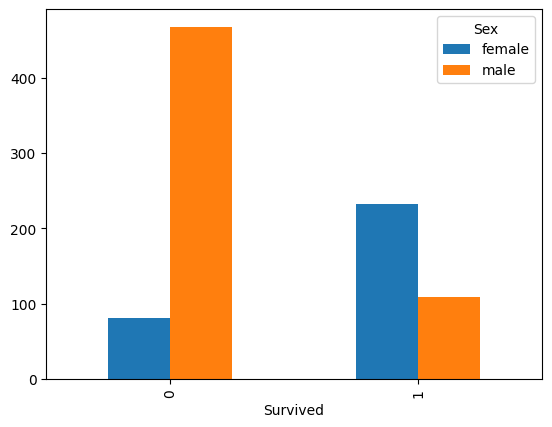

In [47]:
pd.crosstab(df['Survived'],df['Sex']).plot(kind='bar')

<Axes: xlabel='Survived'>

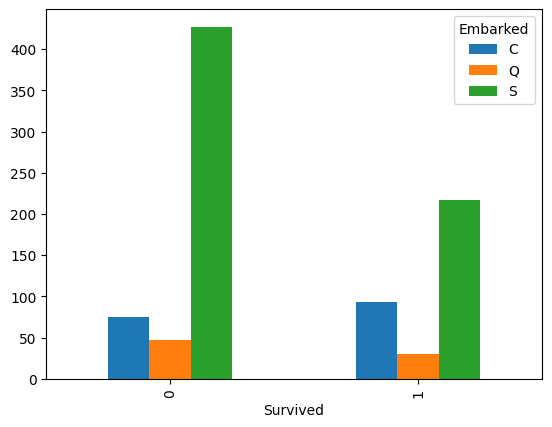

In [48]:
pd.crosstab(df['Survived'],df['Embarked']).plot(kind='bar')

In [49]:
ord_s=OrdinalEncoder()
ord_changed=ord_s.fit_transform(df[['Sex']])
ord_e=OrdinalEncoder()
ord_new=ord_e.fit_transform(df[['Embarked']])

In [50]:
df['sex']=ord_changed
df['Embarked']=ord_new

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    float64
 7   sex       891 non-null    float64
dtypes: float64(3), int64(4), object(1)
memory usage: 55.8+ KB


In [52]:
df=df.drop(['Sex','SibSp','Age'],axis=1)

In [54]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].median())

In [55]:
inputs=df.drop(['Survived'],axis=1)
target=df['Survived']

In [56]:
x_train,x_test,y_train,y_test=train_test_split(inputs,target,random_state=42,test_size=0.1)

In [57]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [58]:
model.score(x_test,y_test)

0.8444444444444444

In [62]:
x_train

,Pclass,Parch,Embarked,sex
165,3,2,2.0,1.0
541,3,2,2.0,0.0
625,1,0,2.0,1.0
388,3,0,1.0,1.0
76,3,0,2.0,1.0
...,...,...,...,...
106,3,0,2.0,0.0
270,1,0,2.0,1.0
860,3,0,2.0,1.0
435,1,2,2.0,0.0


In [64]:
model.predict([[2,2,1,1]])

C:\Users\prachi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)